# Linear Regression

Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (x) variables. It uses a best fit line to train a model and do predictions.

Mathematical Inituition:

Let y be the dependent variable and x be the independent variable.
##### Equation: y=mx+c (linear line equation) 

y:dependent variable
m:slope
c:some constant

To calculate the best fit line in the model the cost function and the gradient descent are used.

### Cost Function

##### Cost Function(J)= 1/2n(Σi=1 to n(hi-yi)^2)

where:
n=number of points
i=number of values of x
hi=predicted value
yi=original or actual value

### Gradient Decsent

Graph is plotted between the Cost Fuction(J) and the value of slope(m)

for every iteration
m=m-derivative(m) * alpha(learning rate)

###### dervative of m determines the slope of gradient descent 
###### learning rate defines the multiplying factor that should be small to avoid the problem of not reaching the global minima even after many iterations


# Basic Linear Regression Code:
#### equation be : A0+A1x+e
##### e: residual error



##### Our task is to find the value of A0 and A1 for which J(A0,A1) is minimum.
Without going into the mathematical details, we present the result here:
<img src="1.png" style="height:270px;width:80%"/>  

Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


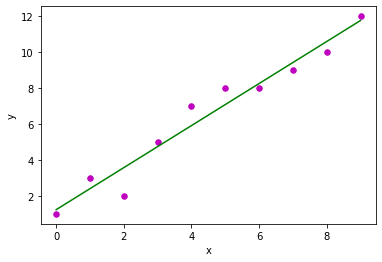

In [1]:
import numpy as np
import matplotlib.pyplot as plt
  
def estimate_coef(x, y):
    # number of points
    n = np.size(x)
    
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()
  
def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
  
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
  
    # plotting regression line
    plot_regression_line(x, y, b)
  
if __name__ == "__main__":
    main()

# Multiple Linear Regression

##### Multiple Linear Regression is the extension of simple linear regression. In simple linear regression we try to fit only on dependent and independent variable but in multiple linear regression we try to find the relationship between two or more features and generate a response by fitting a linear eqaution.

#### Equation will be of form:
#### y=A0+A1x1+A2x2+A3x3+......+Anxn

#### To determine multiple linear regression we will use the botson housing dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model,metrics
%matplotlib inline

In [12]:
warnings.filterwarnings('ignore')

boston=datasets.load_boston(return_X_y=False)

In [14]:
X=boston.data
y=boston.target

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
regression_model=linear_model.LinearRegression()

In [18]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [19]:
print(f"Coefficients:{regression_model.coef_}")

Coefficients:[-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


#### The above coefficients are the slope with respect to different featues present in the dataset

#### Variance score = 1-Var(y-hi)/Var(y)

##### desired value is close to 1

In [20]:
print(f'Variance score: {regression_model.score(X_test, y_test)}')

Variance score: 0.7836295385076291


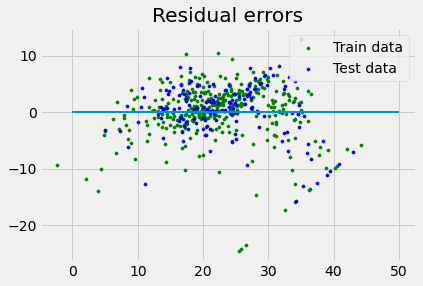

In [27]:
plt.style.use('fivethirtyeight')
  
# plotting residual errors in training data
plt.scatter(regression_model.predict(X_train), regression_model.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
# plotting residual errors in test data
plt.scatter(regression_model.predict(X_test), regression_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
# plotting legend
plt.legend(loc = 'upper right')
  
# plot title
plt.title("Residual errors")
  
# method call for showing the plot
plt.show()
